In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
class Perceptron:

    """
    Parameters
    --------------
    lr: float
        Learning rate
    epochs: int
        Number of iterations to train on the data
    random_state: int 
        Random number generator seed for random weight
        initialization

    Attributes
    --------------
    w_ : 1d-array
        weights
    b_ : Scalar 
        bias
    """
    def __init__(self, lr = 0.01, epochs = 50, random_state=1):
        self.lr = lr
        self.epochs = epochs
        self.random_state = random_state
    
    def fit(self, X,y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = 0.0
        self.errors_ = []
        for epoch in range(self.epochs):
            errorPerEpoch = 0
            for x, target in zip(X,y):
                y_hat = self.predict(x)
                error = (target - y_hat)* self.lr

                #weight updates
                self.w_  += error * x
                self.b_ += error

                #add the errors
                errorPerEpoch += error
            self.errors_.append(errorPerEpoch)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_)+ self.b_

    def predict(self,X):
        return np.where(self.net_input(X)>=0.0, 1,0)




        


In [48]:
# get the iris data from uci
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [35]:
df = pd.read_csv(s, header=None, encoding='utf-8')

In [36]:
df[4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

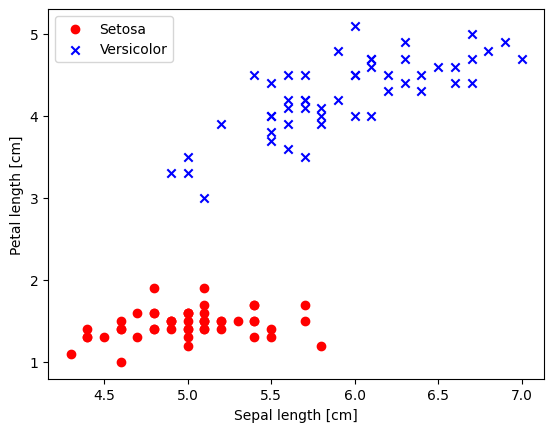

In [49]:
# extract only the setosa and versicolor  //the first 50 are setosa and next fifty are versiColor
y  = df.iloc[0:100, 4].values
y = np.where(y=="Iris-setosa", 0, 1)
X = df.iloc[0:100, [0,2]].values
X.

#plot them
plt.scatter(X[:50, 0], X[:50,1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:, 0], X[50:,1], color='blue', marker='x', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()


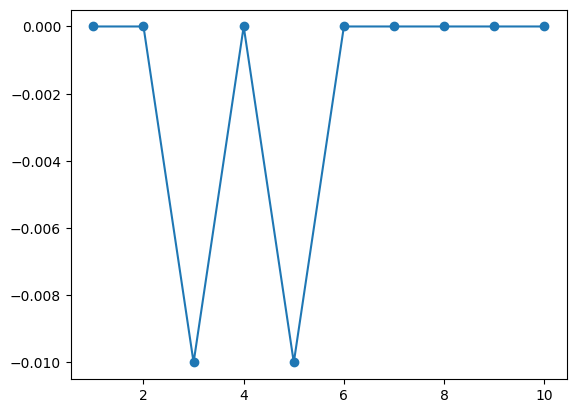

In [64]:
pp = Perceptron(lr=0.01, epochs=10, random_state=4)
pp.fit(X,y)
plt.plot(range(1, 1+len(pp.errors_)), pp.errors_, marker="o")

In [65]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

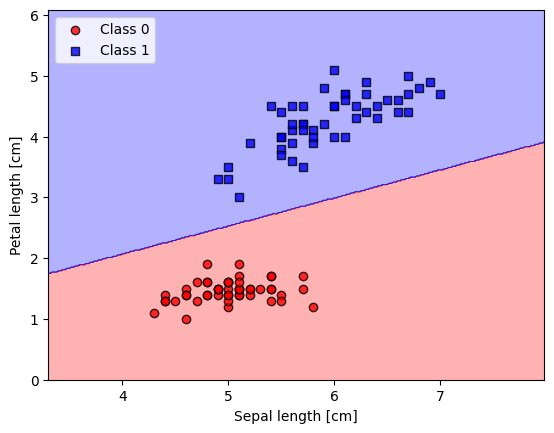

In [66]:
plot_decision_regions(X, y, classifier=pp)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()